# DACON Data

> 매월 생성되는 암호 화폐 데이터를 가공

## About Dacon

- 23시간 동안의 코인 하나의 분단위 특징 변화를 입력으로 받음
    - 개별 샘플에 대해
- 2시간 동안 코인의 분 단위 open가격(시가)의 움직임을 추론
    - 매도량(매수비율), 매도 시점 예측
    - 개별 샘플마다 모든 매수한 코인을 2시간 내에 모두 매도
    
- 그렇다면 추세를 보고, 2시간 후의 추세(가격)을 예측하고
    - 이를 판매하는 과정이겠다..
    
- 방법
    - 초기자본 10000달러
    - 시가 기준 계산
    
## About Data

### Train Data
- 총 10가지 종류의 코인을 포함하는 7352가지의 sample
- test data

### Test Data
- train_x와 동일한 구성을 갖는 529가지의 sample

### 3차원 데이터
- col1 -> sampleID, 하나의 샘플 => 1380 rows 
- col2 -> time
- col3 -> coin_index

### columns
- sample_id : 개별 샘플의 인덱스
- time : x_df는 0분 ~ 1379분, y_df는 0분 ~ 119분의 값을 갖습니다. 동일한 샘플 내 시간 정보
- coin_index : 10가지 종류의 코인에 대한 비식별화 인덱스 (0 ~9)
- open : open price
- high : high price
- low : low price
- close : close price
- volume : 거래량
- quote_av : quote asset volume 
    - 단위의 차이
- trades : 거래 건 수
- tb_base_av : taker buy base asset volume
    - 구매자가 테이커, 셀러가 메이커
    - 볼륨 - tb_base_av = mb_base_av
    - 볼륨 - 테이커 매입 기준 자산 볼륨 = 메이커 매입 기준 자산 볼륨
    - base asset = > asset that is the `quantity`of symbol
- tb_quote_av : taker buy quote asset volume
    - 상동
    - quote asset => asset that is the `price` of symbol
    
    
### x의 종가에서 매수해서 y의 어떤 시점에 판매?
- 한 샘플로 하라는 이야기는
    - 23시간 train_x에서 sample id 하나를 가지고 학습시킨 다음에
    - 

- 판매자
- 지정가 -> 메이커
- 시장가 -> 테이커

### 고민해볼 것 

- 메이커와
- 테이커의 시장 변동성 -> 가격변동성에 미치는 영향 

## Import Packages

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from mplfinance.original_flavor import candlestick_ohlc

## Load dataframes

In [6]:
test_x_df = pd.read_csv('test_x_df.csv')
train_x_df = pd.read_csv('train_x_df.csv')
train_y_df = pd.read_csv('train_y_df.csv')

### Summaries

In [7]:
test_x_df.info()
test_x_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738300 entries, 0 to 738299
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   sample_id    738300 non-null  int64  
 1   time         738300 non-null  int64  
 2   coin_index   738300 non-null  int64  
 3   open         738300 non-null  float64
 4   high         738300 non-null  float64
 5   low          738300 non-null  float64
 6   close        738300 non-null  float64
 7   volume       738300 non-null  float64
 8   quote_av     738300 non-null  float64
 9   trades       738300 non-null  float64
 10  tb_base_av   738300 non-null  float64
 11  tb_quote_av  738300 non-null  float64
dtypes: float64(9), int64(3)
memory usage: 67.6 MB


,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
0,7661,0,7,0.993560,0.993560,0.990477,0.991021,587512.625000,534685.312500,553.533691,76317.687500,69457.835938
1,7661,1,7,0.990771,0.993048,0.990357,0.992689,616675.437500,560815.937500,514.306885,291661.375000,265331.843750
2,7661,2,7,0.992710,0.993560,0.991316,0.991795,670641.687500,610829.625000,361.758240,288066.125000,262389.562500
3,7661,3,7,0.992318,0.992318,0.990695,0.990727,365400.343750,332430.937500,329.069244,113585.000000,103350.929688
4,7661,4,7,0.991141,0.991152,0.989158,0.989605,245272.531250,222917.734375,481.617889,70405.781250,63988.847656
...,...,...,...,...,...,...,...,...,...,...,...,...
738295,8195,1375,6,0.997053,0.999276,0.997053,0.999069,1.633000,315.307526,1.375175,0.878884,169.736862
738296,8195,1376,6,0.999121,1.000569,0.998552,1.000569,1.478406,285.818695,1.039136,0.455307,88.052055
738297,8195,1377,6,1.000569,1.001086,0.999121,0.999690,0.848792,164.188950,0.935739,0.445028,86.055450
738298,8195,1378,6,0.999690,1.000207,0.998863,1.000000,1.099217,212.537872,0.723776,0.410302,79.334801


In [10]:
test_x_df.describe()

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
count,738300.000000,738300.000000,738300.000000,738300.000000,738300.000000,738300.000000,738300.000000,7.383000e+05,7.383000e+05,738300.000000,7.383000e+05,7.383000e+05
mean,7928.000000,689.500000,4.523364,0.998532,0.999957,0.997084,0.998535,2.989976e+05,1.617584e+05,212.523181,1.488453e+05,8.052934e+04
std,154.441032,398.371851,2.872188,0.050871,0.051035,0.050681,0.050841,1.409777e+06,7.476346e+05,731.119226,6.954391e+05,3.691303e+05
min,7661.000000,0.000000,0.000000,0.636172,0.637117,0.633794,0.636182,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,7794.000000,344.750000,2.000000,0.977564,0.978921,0.976213,0.977595,4.232442e-01,3.470505e+02,0.407351,2.044330e-01,1.587046e+02
50%,7928.000000,689.500000,5.000000,0.999854,1.001014,0.998631,0.999848,1.246647e+02,3.421509e+03,5.513136,5.733732e+01,1.545608e+03
75%,8062.000000,1034.250000,7.000000,1.021063,1.022351,1.019737,1.021032,1.466893e+05,8.463166e+04,195.121948,6.284492e+04,3.775643e+04
max,8195.000000,1379.000000,9.000000,1.932401,1.948739,1.925845,1.932581,1.643182e+08,9.179647e+07,79387.242188,7.967944e+07,3.681243e+07


In [4]:
train_x_df.info()
train_x_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10572180 entries, 0 to 10572179
Data columns (total 12 columns):
 #   Column       Dtype  
---  ------       -----  
 0   sample_id    int64  
 1   time         int64  
 2   coin_index   int64  
 3   open         float64
 4   high         float64
 5   low          float64
 6   close        float64
 7   volume       float64
 8   quote_av     float64
 9   trades       float64
 10  tb_base_av   float64
 11  tb_quote_av  float64
dtypes: float64(9), int64(3)
memory usage: 967.9 MB


,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
0,0,0,9,0.983614,0.983614,0.983128,0.983246,0.001334,10.650987,0.009855,0.000848,6.771755
1,0,1,9,0.983245,0.983612,0.982453,0.982693,0.001425,11.375689,0.016137,0.000697,5.565188
2,0,2,9,0.982694,0.983612,0.982403,0.983002,0.001542,12.301942,0.014166,0.000905,7.225459
3,0,3,9,0.983009,0.984848,0.983009,0.984486,0.002520,20.134695,0.021557,0.001171,9.353000
4,0,4,9,0.984233,0.984606,0.983612,0.984164,0.002818,22.515448,0.021434,0.001799,14.372534
...,...,...,...,...,...,...,...,...,...,...,...,...
10572175,7660,1375,8,1.000277,1.000499,1.000000,1.000388,0.574281,103.592369,0.665410,0.266649,48.100475
10572176,7660,1376,8,1.000333,1.000388,0.999834,1.000277,1.350429,243.535217,0.804037,0.487857,87.985291
10572177,7660,1377,8,1.000277,1.000388,0.999834,1.000277,0.692170,124.846756,0.781857,0.360461,65.018936
10572178,7660,1378,8,1.000166,1.000222,0.999778,1.000056,0.556481,100.351929,0.670955,0.296588,53.486565


In [11]:
train_x_df.describe()

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
count,1.057218e+07,1.057218e+07,1.057218e+07,1.057218e+07,1.057218e+07,1.057218e+07,1.057218e+07,1.057218e+07,1.057218e+07,1.057218e+07,1.057218e+07,1.057218e+07
mean,3.830000e+03,6.895000e+02,5.456729e+00,1.000650e+00,1.001450e+00,9.998227e-01,1.000642e+00,7.761177e+05,4.792650e+04,1.261575e+02,3.706698e+05,2.368729e+04
std,2.211540e+03,3.983716e+02,2.943867e+00,4.027305e-02,4.032254e-02,4.022103e-02,4.024325e-02,9.201730e+06,2.461396e+05,5.192760e+02,5.188063e+06,1.279145e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,8.903663e-02,5.540227e-01,8.903663e-02,5.540227e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.915000e+03,3.447500e+02,4.000000e+00,9.865683e-01,9.873150e-01,9.858038e-01,9.865824e-01,6.036940e-02,3.364670e+01,8.322930e-02,6.927575e-03,1.156383e+01
50%,3.830000e+03,6.895000e+02,6.000000e+00,1.000000e+00,1.000500e+00,9.993641e-01,9.999900e-01,3.708659e+00,3.692633e+02,8.632804e-01,1.167656e+00,1.318855e+02
75%,5.745000e+03,1.034250e+03,8.000000e+00,1.012913e+00,1.013659e+00,1.012141e+00,1.012891e+00,4.461639e+04,1.351256e+04,5.891339e+01,9.740486e+03,5.306334e+03
max,7.660000e+03,1.379000e+03,9.000000e+00,2.066901e+00,4.451831e+00,2.066901e+00,2.066901e+00,7.398036e+09,4.957759e+07,6.257862e+04,7.340513e+09,2.320023e+07


In [8]:
train_y_df.info()
train_y_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919320 entries, 0 to 919319
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   sample_id    919320 non-null  int64  
 1   time         919320 non-null  int64  
 2   coin_index   919320 non-null  int64  
 3   open         919320 non-null  float64
 4   high         919320 non-null  float64
 5   low          919320 non-null  float64
 6   close        919320 non-null  float64
 7   volume       919320 non-null  float64
 8   quote_av     919320 non-null  float64
 9   trades       919320 non-null  float64
 10  tb_base_av   919320 non-null  float64
 11  tb_quote_av  919320 non-null  float64
dtypes: float64(9), int64(3)
memory usage: 84.2 MB


,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
0,0,0,9,0.999389,0.999630,0.999261,0.999385,0.001187,9.632785,0.012565,0.000605,4.904978
1,0,1,9,0.999593,1.000000,0.999265,0.999266,0.004197,34.052364,0.020572,0.003014,24.453999
2,0,2,9,0.999266,0.999618,0.999262,0.999322,0.003942,31.981472,0.016630,0.002967,24.069899
3,0,3,9,0.999322,0.999388,0.998917,0.999387,0.003663,29.709074,0.019463,0.002362,19.158766
4,0,4,9,0.999015,0.999015,0.997631,0.998399,0.003266,26.466251,0.030180,0.001533,12.421005
...,...,...,...,...,...,...,...,...,...,...,...,...
919315,7660,115,8,1.002662,1.003382,1.002606,1.002717,0.957148,173.131668,0.510148,0.476201,86.143784
919316,7660,116,8,1.002551,1.002606,1.001608,1.001830,1.537946,277.939087,0.465787,1.061331,191.801056
919317,7660,117,8,1.001830,1.002384,1.001497,1.001608,1.203197,217.364487,0.637684,0.971337,175.472198
919318,7660,118,8,1.001608,1.001941,1.001109,1.001386,1.252859,226.264069,1.003660,0.449899,81.251137


### Sample Id, Coin_index

In [6]:
pd.pivot_table( train_x_df[['coin_index','sample_id']], index=['coin_index','sample_id'] ,aggfunc='count')

Empty DataFrame
Columns: []
Index: [(0, 3), (0, 7), (0, 8), (0, 14), (0, 30), (0, 34), (0, 38), (0, 57), (0, 59), (0, 62), (0, 64), (0, 78), (0, 89), (0, 91), (0, 99), (0, 103), (0, 119), (0, 138), (0, 146), (0, 150), (0, 151), (0, 172), (0, 177), (0, 190), (0, 195), (0, 217), (0, 225), (0, 228), (0, 232), (0, 240), (0, 257), (0, 278), (0, 292), (0, 317), (0, 318), (0, 321), (0, 325), (0, 326), (0, 330), (0, 333), (0, 336), (0, 345), (0, 346), (0, 347), (0, 358), (0, 369), (0, 376), (0, 384), (0, 398), (0, 415), (0, 417), (0, 418), (0, 420), (0, 439), (0, 481), (0, 503), (0, 507), (0, 515), (0, 519), (0, 523), (0, 547), (0, 548), (0, 549), (0, 557), (0, 558), (0, 560), (0, 576), (0, 578), (0, 581), (0, 588), (0, 598), (0, 599), (0, 603), (0, 607), (0, 616), (0, 624), (0, 632), (0, 641), (0, 653), (0, 676), (0, 684), (0, 686), (0, 687), (0, 691), (0, 708), (0, 711), (0, 718), (0, 722), (0, 725), (0, 728), (0, 737), (0, 744), (0, 745), (0, 752), (0, 784), (0, 787), (0, 788), (0, 789), (0, 795), (0, 806), ...]

[7661 rows x 0 columns]

In [17]:
pd.pivot_table( train_x_df[['coin_index','sample_id']], index=['sample_id','coin_index'] ,aggfunc='count')

,
sample_id,coin_index
0,9
1,9
2,4
3,0
4,7
...,...
7656,1
7657,9
7658,6


In [7]:
len(train_x_df.sample_id.unique())

7661

### Sample candlestick Chart

In [52]:
def draw_candlestick(df):  # 봉차트 <-> 거래량
    fig = plt.figure(figsize=(16, 10))
    fig.set_facecolor('w')
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])
    axes = []
    axes.append(plt.subplot(gs[0]))
    axes.append(plt.subplot(gs[1], sharex=axes[0]))
    axes[0].get_xaxis().set_visible(False)

    x = np.arange(len(df.index))
    ohlc = df[['open', 'high', 'low', 'close']].astype(float).values
    dohlc = np.hstack((np.reshape(x, (-1, 1)), ohlc))

    # 봉차트
    candlestick_ohlc(axes[0], dohlc, width=0.5, colorup='r', colordown='b')

    # 거래량 차트
    axes[1].bar(x, df.volume, color='k', width=0.6, align='center')

    plt.tight_layout()
    plt.show()

In [13]:
def draw_candlestick_trades(df):  # 봉차트 <-> 거래건 수
    fig = plt.figure(figsize=(16, 10))
    fig.set_facecolor('w')
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])
    axes = []
    axes.append(plt.subplot(gs[0]))
    axes.append(plt.subplot(gs[1], sharex=axes[0]))
    axes[0].get_xaxis().set_visible(False)

    x = np.arange(len(df.index))
    ohlc = df[['open', 'high', 'low', 'close']].astype(float).values
    dohlc = np.hstack((np.reshape(x, (-1, 1)), ohlc))

    # 봉차트
    candlestick_ohlc(axes[0], dohlc, width=0.5, colorup='r', colordown='b')

    # 거래량 차트
    axes[1].bar(x, df.trades, color='k', width=0.6, align='center')

    plt.tight_layout()
    plt.show()

In [14]:
def draw_candlestick_quote(df):  # 봉차트 <-> quote_av
    fig = plt.figure(figsize=(16, 10))
    fig.set_facecolor('w')
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])
    axes = []
    axes.append(plt.subplot(gs[0]))
    axes.append(plt.subplot(gs[1], sharex=axes[0]))
    axes[0].get_xaxis().set_visible(False)

    x = np.arange(len(df.index))
    ohlc = df[['open', 'high', 'low', 'close']].astype(float).values
    dohlc = np.hstack((np.reshape(x, (-1, 1)), ohlc))

    # 봉차트
    candlestick_ohlc(axes[0], dohlc, width=0.5, colorup='r', colordown='b')

    # 거래량 차트
    axes[1].bar(x, df.quote_av, color='k', width=0.6, align='center')

    plt.tight_layout()
    plt.show()

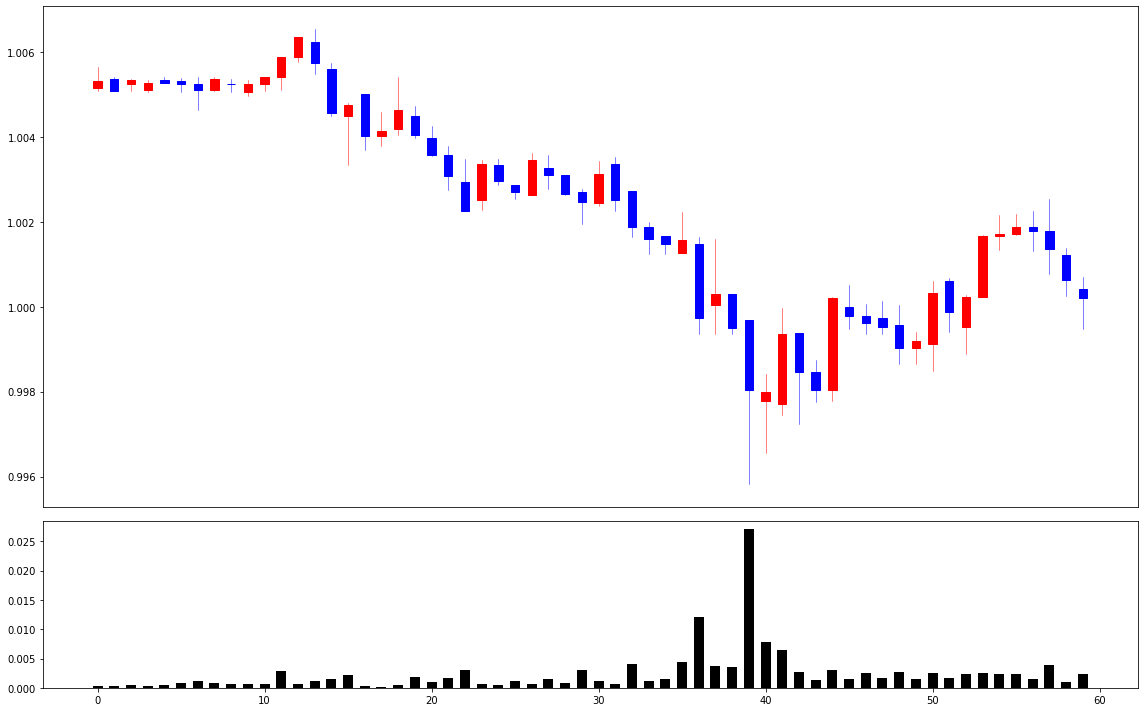

In [53]:
draw_candlestick(train_x_df[train_x_df.sample_id == 1][0:60])

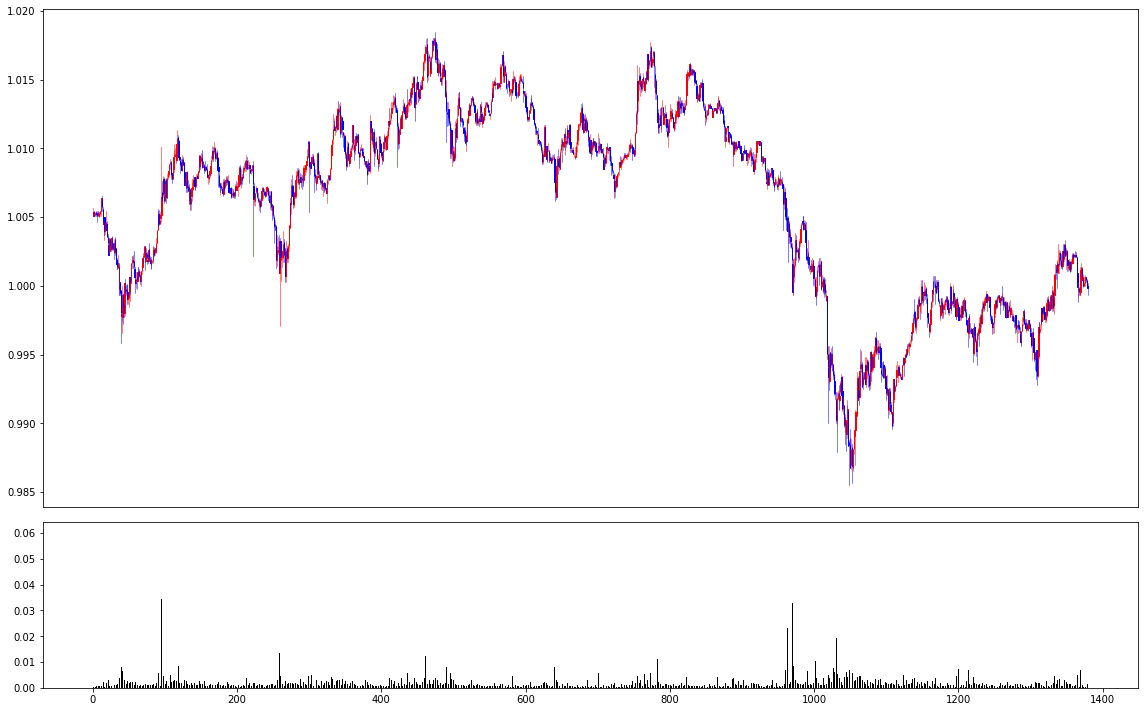

In [9]:
draw_candlestick(train_x_df[train_x_df.sample_id == 1])

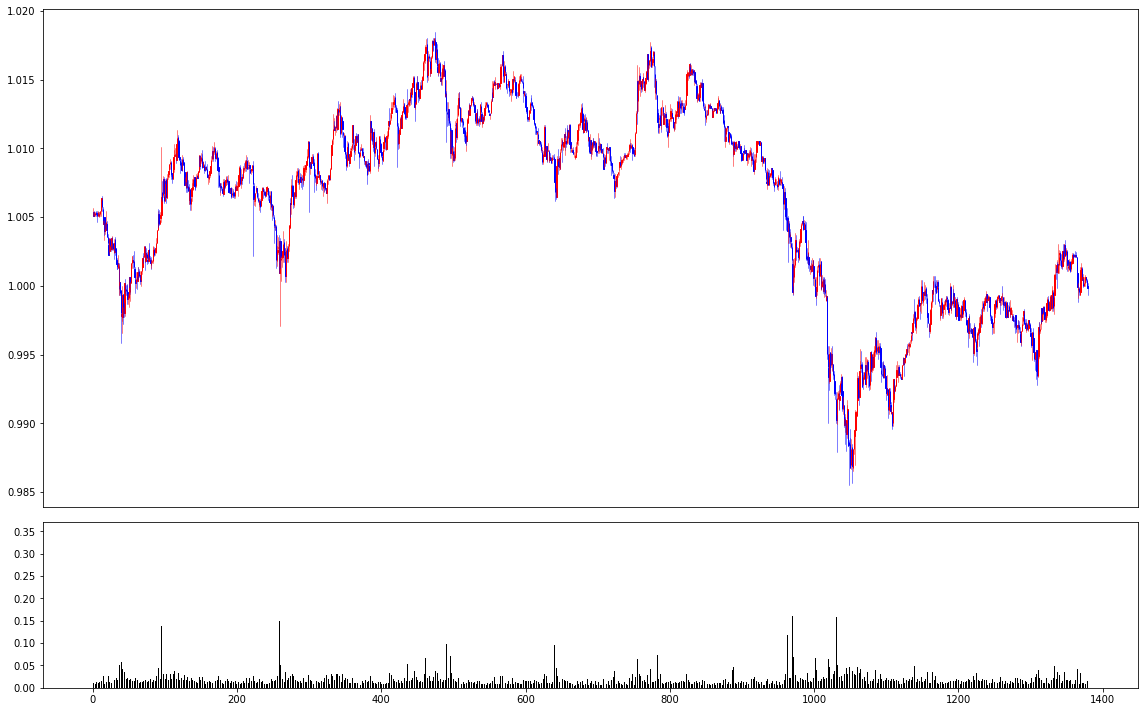

In [15]:
draw_candlestick_trades(train_x_df[train_x_df.sample_id == 1])

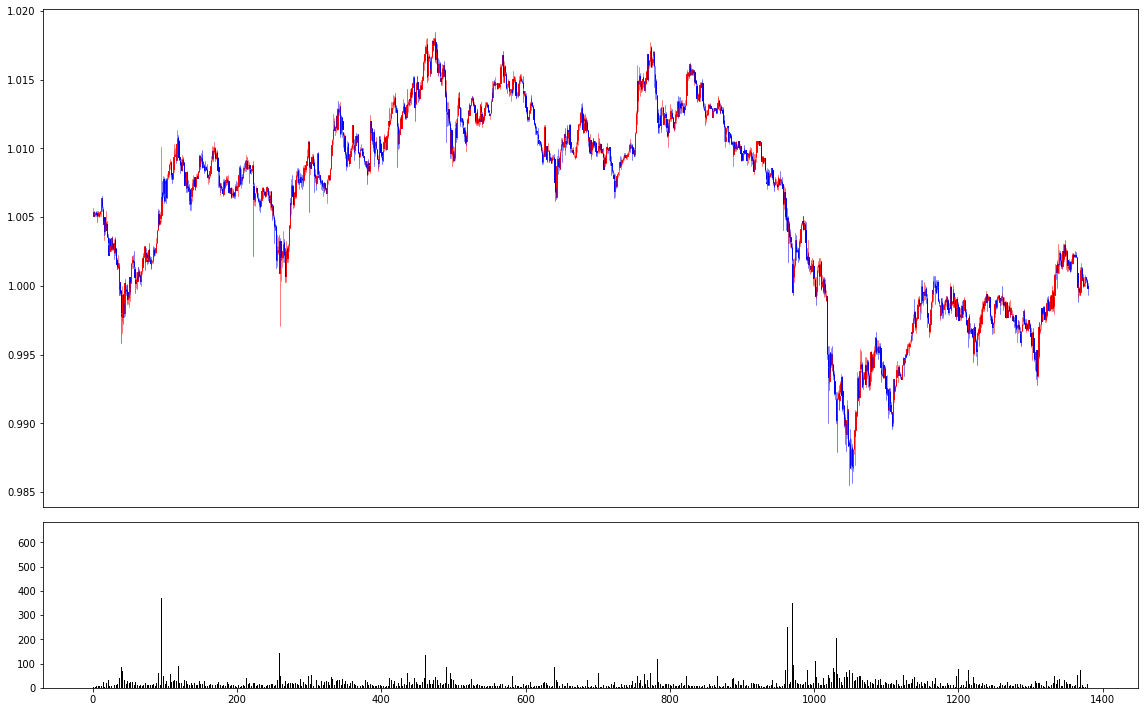

In [16]:
draw_candlestick_quote(train_x_df[train_x_df.sample_id == 1])

In [ ]:
# 이동평균 만들어보자

roll_mean5 = pd.Series.rolling(train_x_df[''], window=5, center = False).mean()
roll_mean10 = pd.Series.rolling(new_cospi_HL['High'], window=10, center = False).mean()
roll_mean20 = pd.Series.rolling(new_cospi_HL['High'], window=20, center = False).mean()

In [35]:
x = train_x_df[train_x_df.sample_id == 1][0:60]

In [36]:
x['ma10'] = x['close'].rolling(window=10).mean()
x['ma30'] = x['close'].rolling(window=30).mean()
x['ma60'] = x['close'].rolling(window=60).mean()

In [61]:
def draw_close_ma(df):  # 봉차트 <-> 거래량
    df['ma10'] = df['close'].rolling(window=10).mean()
    df['ma30'] = df['close'].rolling(window=30).mean()
    df['ma60'] = df['close'].rolling(window=60).mean()
    
    
    fig = plt.figure(figsize=(16, 10))
    fig.set_facecolor('w')
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])
    axes = []
    axes.append(plt.subplot(gs[0]))
    axes.append(plt.subplot(gs[1], sharex=axes[0]))
    axes[0].get_xaxis().set_visible(False)

    axes[0].plot(df.time, df.close)
    axes[0].plot(df.time, df.ma10)
    axes[0].plot(df.time, df.ma30)
    axes[0].plot(df.time, df.ma60)
    axes[1].bar(df.time,df.quote_av, color='k', width=0.6, align='center')

    plt.tight_layout()
    plt.show()    
    
    plt.show()

<ipython-input-61-c5ba5e68b6d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ma10'] = df['close'].rolling(window=10).mean()
<ipython-input-61-c5ba5e68b6d7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ma30'] = df['close'].rolling(window=30).mean()
<ipython-input-61-c5ba5e68b6d7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

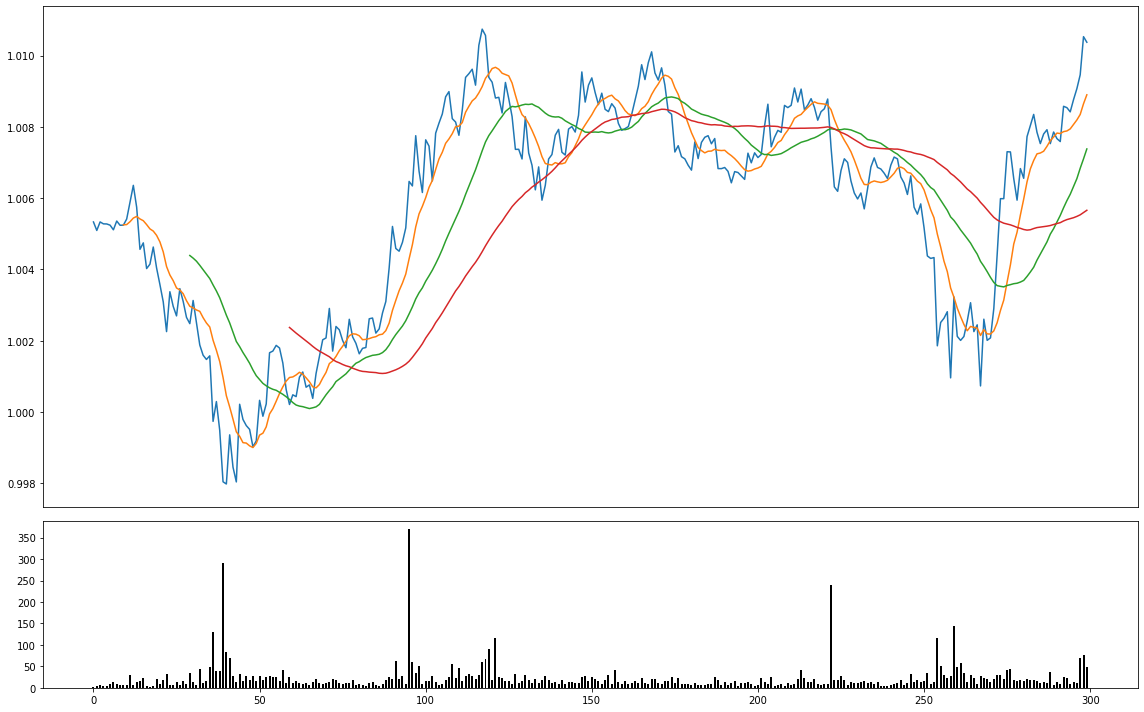

In [66]:
sample1 = train_x_df[train_x_df.sample_id == 1]
draw_close_ma(sample1[0:300]);

In [48]:
train_x_df

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
0,0,0,9,0.983614,0.983614,0.983128,0.983246,0.001334,10.650987,0.009855,0.000848,6.771755
1,0,1,9,0.983245,0.983612,0.982453,0.982693,0.001425,11.375689,0.016137,0.000697,5.565188
2,0,2,9,0.982694,0.983612,0.982403,0.983002,0.001542,12.301942,0.014166,0.000905,7.225459
3,0,3,9,0.983009,0.984848,0.983009,0.984486,0.002520,20.134695,0.021557,0.001171,9.353000
4,0,4,9,0.984233,0.984606,0.983612,0.984164,0.002818,22.515448,0.021434,0.001799,14.372534
...,...,...,...,...,...,...,...,...,...,...,...,...
10572175,7660,1375,8,1.000277,1.000499,1.000000,1.000388,0.574281,103.592369,0.665410,0.266649,48.100475
10572176,7660,1376,8,1.000333,1.000388,0.999834,1.000277,1.350429,243.535217,0.804037,0.487857,87.985291
10572177,7660,1377,8,1.000277,1.000388,0.999834,1.000277,0.692170,124.846756,0.781857,0.360461,65.018936
10572178,7660,1378,8,1.000166,1.000222,0.999778,1.000056,0.556481,100.351929,0.670955,0.296588,53.486565


<ipython-input-61-c5ba5e68b6d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ma10'] = df['close'].rolling(window=10).mean()
<ipython-input-61-c5ba5e68b6d7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ma30'] = df['close'].rolling(window=30).mean()
<ipython-input-61-c5ba5e68b6d7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

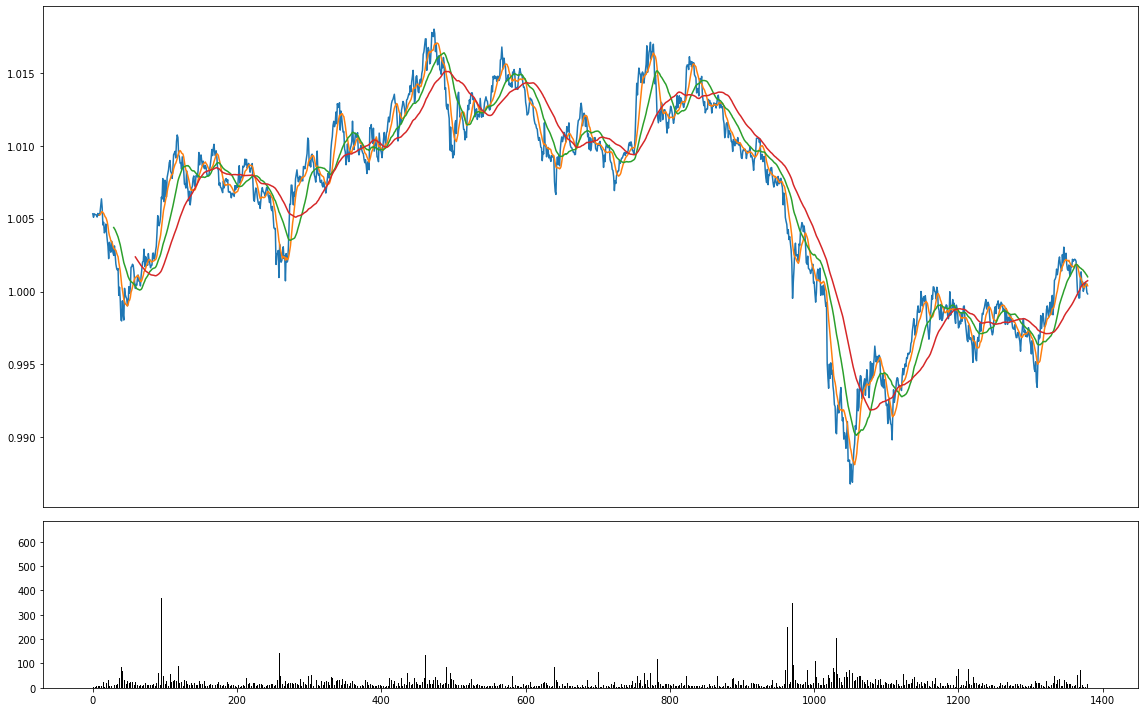

In [67]:
sample1 = train_x_df[train_x_df.sample_id == 1]
draw_close_ma(sample1);

In [68]:
def draw_close_ma(df):  # 봉차트 <-> 거래량
    df['ma10'] = df['close'].rolling(window=10).mean()
    df['ma30'] = df['close'].rolling(window=30).mean()
    df['ma60'] = df['close'].rolling(window=60).mean()
    
    
    fig = plt.figure(figsize=(16, 10))
    fig.set_facecolor('w')
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])
    axes = []
    axes.append(plt.subplot(gs[0]))
    axes.append(plt.subplot(gs[1], sharex=axes[0]))
    axes[0].get_xaxis().set_visible(False)

    axes[0].plot(df.time, df.close)
    axes[0].plot(df.time, df.ma10)
    axes[0].plot(df.time, df.ma30)
    axes[0].plot(df.time, df.ma60)
    axes[1].bar(df.time,df.tb_quote_av, color='k', width=0.6, align='center')

    plt.tight_layout()
    plt.show()    
    
    plt.show()

<ipython-input-68-69c59af8ef99>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ma10'] = df['close'].rolling(window=10).mean()
<ipython-input-68-69c59af8ef99>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ma30'] = df['close'].rolling(window=30).mean()
<ipython-input-68-69c59af8ef99>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

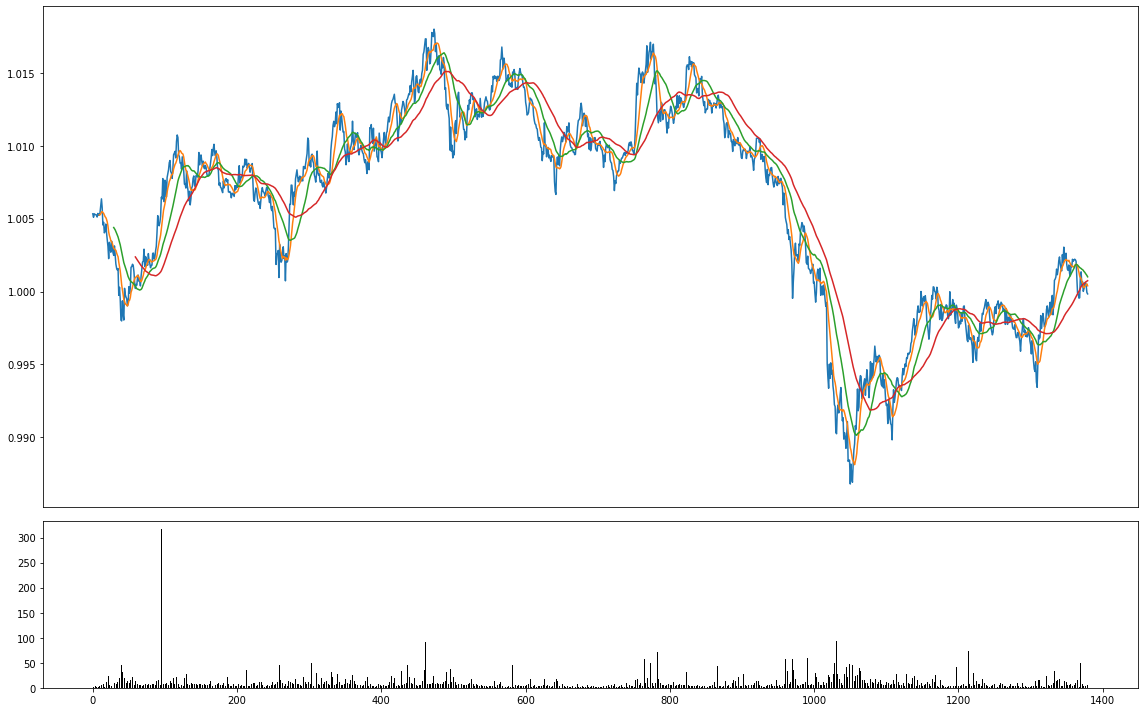

In [69]:
sample1 = train_x_df[train_x_df.sample_id == 1]
draw_close_ma(sample1);